In [1]:
from twod_object import TwoDObject
from kalmanfilter2 import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

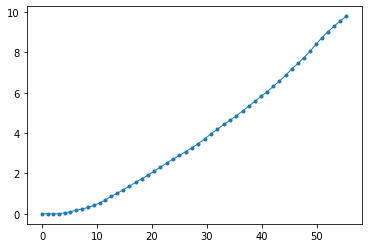

In [2]:
x = np.array([0, 0, 10, 0])
x.shape = (4, 1)
dt = 0.1
ep_normal = 1
ep_tangent = 5
nu = 0.1

gen = TwoDObject(x, dt, ep_normal, ep_tangent, nu)
t = 50
process = gen.process(t)
measure = gen.measure(process)

plt.plot(process[0], process[1], linewidth = 1, marker = '.')

In [3]:
initial_x = np.array([0, 0, 8, 0])

def f(x, u = None):
    out = np.array([0, 0, 0, 0])
    out[0] = x[0] + out[2] * dt
    out[1] = x[1] + out[3] * dt
    out[2] = np.random.normal(0, 1)
    out[3] = np.random.normal(0, 1)
    out.shape = (4, 1)
    return out

def h(x):
    out = np.array([0, 0])
    out.shape = (2, 1)
    out[0, 0] = x[0, 0]
    out[1, 0] = x[1, 0]
    return out

A = np.array([[1, 0, dt, 0],
             [0, 1, 0, dt],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

kf = KalmanFilter(initial_x, f, gen.process_jacobian, h, gen.Q, gen.R, H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]]))

prop = 0.2
output = np.empty((4, 1))
ellipses = []
for i in range(t+1):
    measure_t = measure[:,i]
    measure_t.shape = (2,1)
    if np.random.random() > prop:
        kf.predict(measure_t)
    else:
        kf.predict()
    kalman_output = kf.get_current_guess()
    output = np.append(output, kalman_output, axis=1)
    cov_ = kf.P[0:2, 0:2]
    mean_ = (kf.x_hat[0, 0], kf.x_hat[1, 0])
    ellipses.append(kf.cov_ellipse(mean = mean_, cov = cov_))
output = output[:,1:] # delete the first column (initial data)

[[1. 1.]
 [1. 1.]]
[[0.04801587 0.04801587]
 [0.04801587 0.04801587]]
[[0.03394077 0.01822323]
 [0.01822323 0.04669704]]
[[0.04130042 0.00229763]
 [0.00229763 0.06525445]]
[[ 0.04965224 -0.000456  ]
 [-0.000456    0.07007943]]
[[5.39012162e-02 7.14876288e-05]
 [7.14876288e-05 7.03367285e-02]]
[[0.05513825 0.00026965]
 [0.00026965 0.07034768]]
[[0.05528065 0.00015308]
 [0.00015308 0.07044084]]
[[0.05528065 0.00015308]
 [0.00015308 0.07044084]]
[[5.52342379e-02 4.07273715e-05]
 [4.07273715e-05 7.04957812e-02]]
[[ 5.52260239e-02 -8.28394003e-07]
 [-8.28394003e-07  7.05105829e-02]]
[[ 5.52524114e-02 -5.61073013e-06]
 [-5.61073013e-06  7.05122505e-02]]
[[ 5.52807499e-02 -2.46514303e-06]
 [-2.46514303e-06  7.05122290e-02]]
[[ 5.52978654e-02 -4.77552118e-07]
 [-4.77552118e-07  7.05123349e-02]]
[[5.53050235e-02 1.85557258e-08]
 [1.85557258e-08 7.05124377e-02]]
[[5.53070240e-02 1.88900252e-08]
 [1.88900252e-08 7.05124754e-02]]
[[5.53070240e-02 1.88900252e-08]
 [1.88900252e-08 7.05124754e-02]]
[

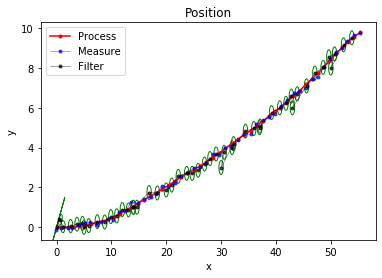

In [4]:
sz = 5 # size of marker
a = 0.7 # transparency
plt.plot(process[0], process[1], lw = 1.5, color = 'red', marker = '.', alpha = 1)
plt.plot(measure[0], measure[1], lw = 0.5, color = 'blue', marker = '.', alpha = a)
plt.plot(output[0], output[1], lw = 0.5, color='black', marker = '.', alpha = a)
plt.title("Position")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Process","Measure","Filter"])

axes  = plt.gca()
#axes.set_aspect(1)
for ellipse in ellipses:
    axes.add_patch(ellipse)
plt.show()